<a href="https://colab.research.google.com/github/Faziliyaishrath/Diabetes_Pred/blob/main/LSTM_(StockPrediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr

/tmp/ipython-input-385720010.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download("AAPL",start=start,end=end)
[*********************100%***********************]  1 of 1 completed


Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.424605  6.439315  6.375672  6.407193  493729600
2010-01-05  6.435713  6.472038  6.401790  6.442318  601904800
2010-01-06  6.333345  6.461231  6.326740  6.435713  552160000
2010-01-07  6.321636  6.364265  6.275705  6.356760  477131200
2010-01-08  6.363665  6.364265  6.276007  6.313231  447610800


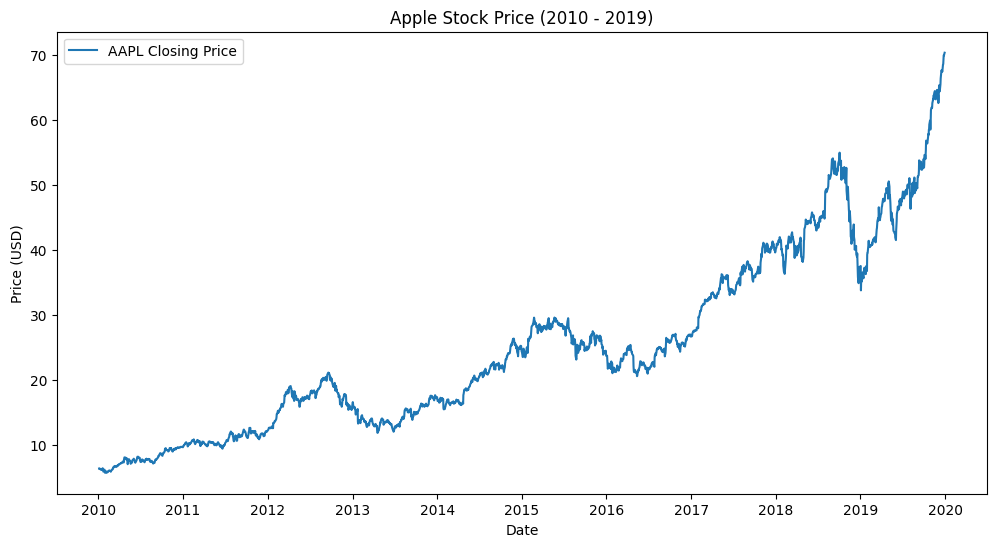

In [ ]:
start = '2010-01-01'
end = '2019-12-31'
df=yf.download("AAPL",start=start,end=end)
print(df.head())

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="AAPL Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Apple Stock Price (2010 - 2019)")
plt.legend()
plt.show()

In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.589760,68.650138,67.713066,67.751709,98572000
2019-12-24,68.654976,68.804720,68.328939,68.756415,48478800
2019-12-26,70.017113,70.034020,68.758831,68.787811,93121200
2019-12-27,69.990540,70.997653,69.584799,70.309339,146266000
2019-12-30,70.405937,70.688511,68.884407,69.908421,144114400


In [ ]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.424605,6.439315,6.375672,6.407193,493729600
1,2010-01-05,6.435713,6.472038,6.401790,6.442318,601904800
2,2010-01-06,6.333345,6.461231,6.326740,6.435713,552160000
3,2010-01-07,6.321636,6.364265,6.275705,6.356760,477131200
4,2010-01-08,6.363665,6.364265,6.276007,6.313231,447610800


In [ ]:
df=df.drop(['Date',],axis=1)
df.head()


/tmp/ipython-input-685534337.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date',],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.424605,6.439315,6.375672,6.407193,493729600
1,6.435713,6.472038,6.401790,6.442318,601904800
2,6.333345,6.461231,6.326740,6.435713,552160000
3,6.321636,6.364265,6.275705,6.356760,477131200
4,6.363665,6.364265,6.276007,6.313231,447610800


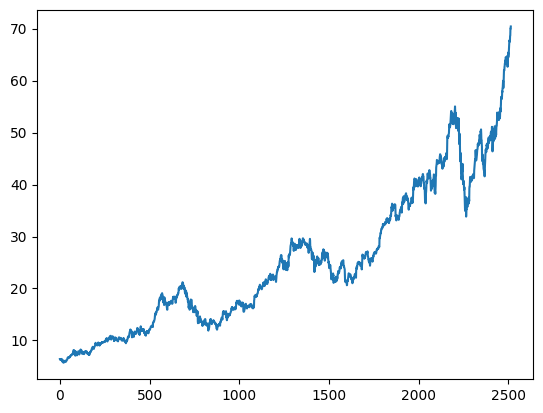

In [ ]:
plt.plot(df.Close)

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.424605,6.439315,6.375672,6.407193,493729600
1,6.435713,6.472038,6.401790,6.442318,601904800
2,6.333345,6.461231,6.326740,6.435713,552160000
3,6.321636,6.364265,6.275705,6.356760,477131200
4,6.363665,6.364265,6.276007,6.313231,447610800
...,...,...,...,...,...
2510,68.589760,68.650138,67.713066,67.751709,98572000
2511,68.654976,68.804720,68.328939,68.756415,48478800
2512,70.017113,70.034020,68.758831,68.787811,93121200


In [ ]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.073139
2511,57.270288
2512,57.506677
2513,57.734021


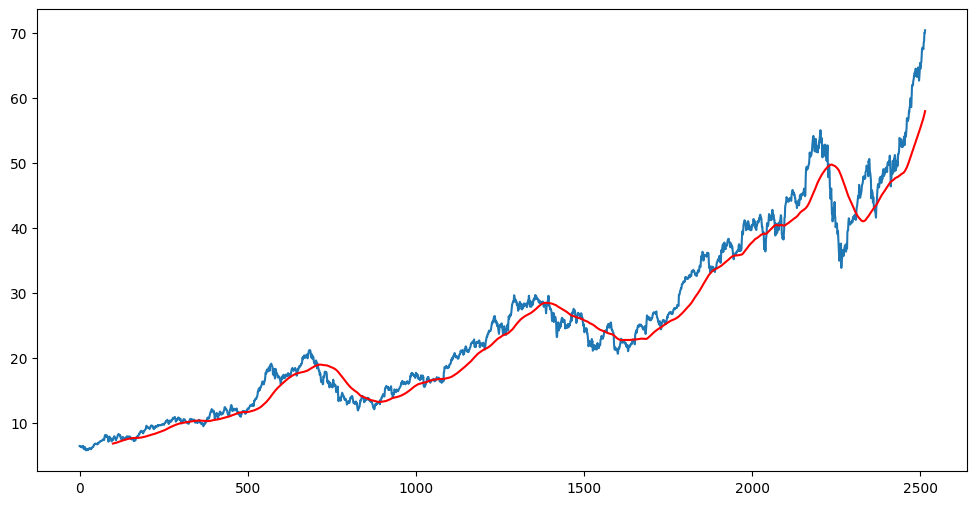

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.037092
2511,52.164217
2512,52.297197
2513,52.427630


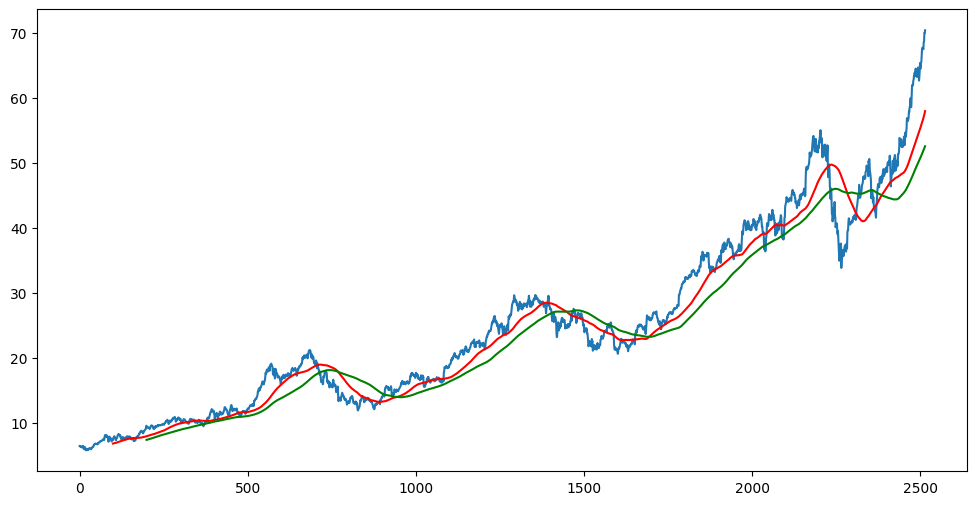

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(2515, 5)

splitting data into taining and testing


In [ ]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [ ]:
data_training.head()

Ticker,AAPL
0,6.424605
1,6.435713
2,6.333345
3,6.321636
4,6.363665


In [ ]:
data_testing.head()

Ticker,AAPL
1760,26.930649
1761,26.720695
1762,26.796835
1763,26.766842
1764,26.902962


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02759998],
       [0.02806505],
       [0.02377926],
       ...,
       [0.88408386],
       [0.89123172],
       [0.88640241]])

In [ ]:
data_training_array.shape

(1760, 1)

In [ ]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)



#ML Model

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50,activation ='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation ='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation ='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 286ms/step - loss: 0.1496
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 296ms/step - loss: 0.0157
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 285ms/step - loss: 0.0116
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 299ms/step - loss: 0.0097
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 285ms/step - loss: 0.0093
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - loss: 0.0087
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - loss: 0.0080
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 288ms/step - loss: 0.0084
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 306ms/step - loss: 0.0089
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 286ms/step - loss: 0.0080
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 293ms/step - loss: 0.0079
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - loss: 0.0068
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - loss: 0.0077
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 302ms/step - loss: 0.0069
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [ ]:
model.save('my_model.keras')

In [ ]:
data_testing.head()

Ticker,AAPL
1760,26.930649
1761,26.720695
1762,26.796835
1763,26.766842
1764,26.902962


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
final_df.head()

Ticker,AAPL
0,24.874210
1,24.975204
2,24.789284
3,24.773216
4,24.830599


In [ ]:
input_data=scaler.transform(final_df)
input_data

array([[0.02573572],
       [0.02789674],
       [0.02391851],
       [0.0235747 ],
       [0.02480255],
       [0.03118725],
       [0.03069623],
       [0.02991031],
       [0.02922274],
       [0.03059812],
       [0.02642321],
       [0.02809321],
       [0.02406588],
       [0.02180654],
       [0.01871243],
       [0.01812314],
       [0.01409577],
       [0.0145869 ],
       [0.0176811 ],
       [0.02259231],
       [0.02244506],
       [0.02568658],
       [0.01173827],
       [0.        ],
       [0.01134541],
       [0.02367294],
       [0.04243438],
       [0.06109759],
       [0.0579052 ],
       [0.05132395],
       [0.05127498],
       [0.05117658],
       [0.05643179],
       [0.04705101],
       [0.04788595],
       [0.04891736],
       [0.05314112],
       [0.04444815],
       [0.04872101],
       [0.04611791],
       [0.04847549],
       [0.04872101],
       [0.05284638],
       [0.05368132],
       [0.06345504],
       [0.06468293],
       [0.06979069],
       [0.068

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


Making Predictions

In [ ]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step


In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
y_test

array([0.06973833, 0.06524585, 0.06687505, 0.06623327, 0.06914589,
       0.07556349, 0.08089486, 0.08148738, 0.08464671, 0.08217833,
       0.08114169, 0.08588084, 0.08583158, 0.08479486, 0.08588084,
       0.08627586, 0.08573277, 0.09516159, 0.09545781, 0.09550723,
       0.09392754, 0.09254514, 0.12907601, 0.12798995, 0.13070504,
       0.13667839, 0.14279973, 0.14531724, 0.15002741, 0.14854   ,
       0.15434088, 0.16291831, 0.16534771, 0.16455452, 0.16638892,
       0.17124752, 0.17328059, 0.1704049 , 0.17104937, 0.17238806,
       0.17268567, 0.18656782, 0.18245286, 0.18651827, 0.18433677,
       0.18522917, 0.18265105, 0.18106442, 0.18334543, 0.18364279,
       0.1826015 , 0.18988955, 0.19103025, 0.18755956, 0.19484761,
       0.18681555, 0.19464958, 0.19217039, 0.1907822 , 0.19197204,
       0.20644945, 0.20803615, 0.20709412, 0.20575539, 0.20595382,
       0.21125879, 0.20754028, 0.20575539, 0.20416876, 0.20332599,
       0.19569055, 0.19653332, 0.1928149 , 0.19668245, 0.19355

In [ ]:
y_predicted

array([[0.15790462],
       [0.15819691],
       [0.1584849 ],
       [0.15876251],
       [0.15902498],
       [0.15926939],
       [0.1594962 ],
       [0.15970922],
       [0.15991332],
       [0.1601139 ],
       [0.16031477],
       [0.16051726],
       [0.16072267],
       [0.16093217],
       [0.16114545],
       [0.16136152],
       [0.16157909],
       [0.16179633],
       [0.1620178 ],
       [0.16225173],
       [0.16250467],
       [0.16277885],
       [0.1630714 ],
       [0.16341403],
       [0.16385603],
       [0.16443078],
       [0.16516322],
       [0.16608477],
       [0.16721639],
       [0.168569  ],
       [0.17013945],
       [0.17191583],
       [0.1738876 ],
       [0.1760431 ],
       [0.17835408],
       [0.1807668 ],
       [0.18327187],
       [0.18585455],
       [0.18849254],
       [0.19115798],
       [0.19382289],
       [0.19646072],
       [0.19906317],
       [0.20162708],
       [0.20415346],
       [0.20663473],
       [0.20905648],
       [0.211

In [ ]:
scaler.scale_

array([0.02139748])

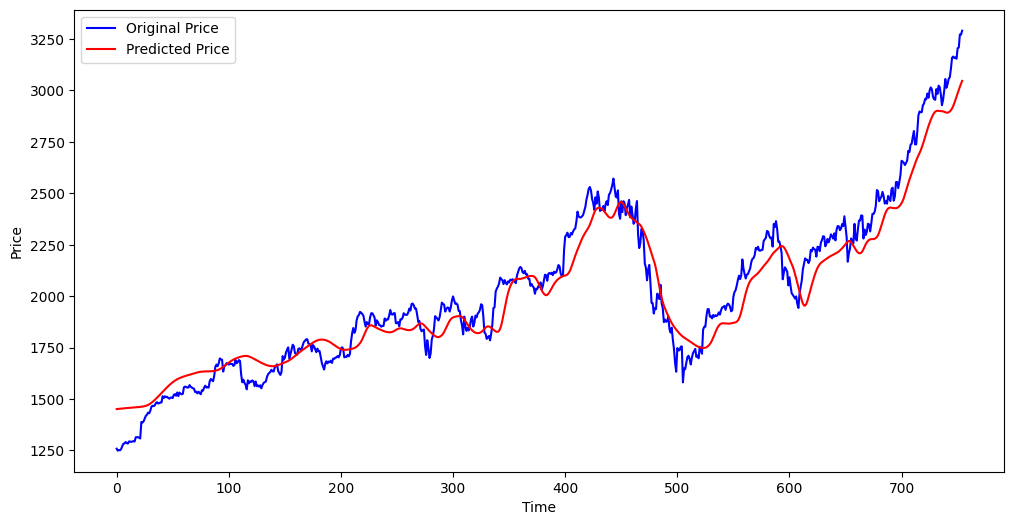

In [ ]:
scale_factor=1/0.02139748
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor
# Now plot
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
